**Connect google drive**

In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Mon Jan 25 06:24:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'
 material
'My Drive'
'pbl2発表会 2.gslides'
 pbl2発表会.pptx
'project management.gslides'
'Screen Recording 2020-01-14 at 16.33.17.mov'
'Screen Recording 2020-01-14 at 18.19.24.mov'
'Screen Recording 2020-01-14 at 18.21.04.mov'
'Screen Recording 2020-01-14 at 18.28.17.mov'
'Screen Recording 2020-01-14 at 18.29.51.mov'
'Screen Recording 2020-01-14 at 18.31.24.mov'
'source code.zip'
 Untitled
 Untitled0.ipynb
'Untitled (1)'
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 yolov3
 yolov3backup
 yolov3Excersice
 なぜなぜ分析.gsheet
'无标题电子表格 (1).gsheet'
 无标题电子表格.gsheet
 演習フォーマット㈭リスク_20191211.gsheet
 语音情感识别


**1) Clone, configure & compile Darknet**



In [3]:
# Clone
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14691 (delta 1), reused 6 (delta 0), pack-reused 14677
Receiving objects: 100% (14691/14691), 13.27 MiB | 24.57 MiB/s, done.
Resolving deltas: 100% (9987/9987), done.


In [4]:
# Configure
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [5]:
# Compile
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

**2) Configure yolov3.cfg file**

In [6]:
# Make a copy of yolov3.cfg
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [7]:
# Change lines in yolov3.cfg file
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 22000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=11@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=11@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=11@' cfg/yolov3_training.cfg
!sed -i '22  s@steps=400000,450000@steps=17000,19000@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=48@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=48@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=48@' cfg/yolov3_training.cfg

**3) Create .names and .data files**

In [8]:
!echo -e "Window with curtain\nWindow Normal\nWindow Opened\nDoor without Handler\nDoor with Handler\nDoor Opened\nPerson\nTree\nHouse\nRoad\ncar"> data/obj.names
!echo -e 'classes= 11\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data

**4) Save yolov3_training.cfg and obj.names files in Google drive**

In [9]:
!cp cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_testing.cfg
!cp data/obj.names /mydrive/yolov3/classes.txt

**5) Create a folder and unzip image dataset**

In [10]:
!mkdir data/obj
!unzip /mydrive/yolov3/images.zip -d data/obj

Archive:  /mydrive/yolov3/images.zip
   creating: data/obj/images/
  inflating: data/obj/__MACOSX/._images  
  inflating: data/obj/images/000152.jpg  
  inflating: data/obj/__MACOSX/images/._000152.jpg  
  inflating: data/obj/images/000146.jpg  
  inflating: data/obj/__MACOSX/images/._000146.jpg  
  inflating: data/obj/images/000191.jpg  
  inflating: data/obj/__MACOSX/images/._000191.jpg  
  inflating: data/obj/images/000185.jpg  
  inflating: data/obj/__MACOSX/images/._000185.jpg  
  inflating: data/obj/images/000050.txt  
  inflating: data/obj/__MACOSX/images/._000050.txt  
  inflating: data/obj/images/000044.txt  
  inflating: data/obj/__MACOSX/images/._000044.txt  
  inflating: data/obj/images/000078.txt  
  inflating: data/obj/__MACOSX/images/._000078.txt  
  inflating: data/obj/images/000093.txt  
  inflating: data/obj/__MACOSX/images/._000093.txt  
  inflating: data/obj/images/000087.txt  
  inflating: data/obj/__MACOSX/images/._000087.txt  
  inflating: data/obj/images/000124.

**6) Create train.txt file**

In [11]:
import glob
images_list = glob.glob("data/obj/images/*.jpg")
print(images_list)
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

['data/obj/images/000003.jpg', 'data/obj/images/000125.jpg', 'data/obj/images/000123.jpg', 'data/obj/images/000169.jpg', 'data/obj/images/000050.jpg', 'data/obj/images/000190.jpg', 'data/obj/images/000137.jpg', 'data/obj/images/000070.jpg', 'data/obj/images/000054.jpg', 'data/obj/images/000171.jpg', 'data/obj/images/000089.jpg', 'data/obj/images/000145.jpg', 'data/obj/images/000151.jpg', 'data/obj/images/000092.jpg', 'data/obj/images/000148.jpg', 'data/obj/images/000077.jpg', 'data/obj/images/000113.jpg', 'data/obj/images/000034.jpg', 'data/obj/images/000053.jpg', 'data/obj/images/000142.jpg', 'data/obj/images/000189.jpg', 'data/obj/images/000017.jpg', 'data/obj/images/000143.jpg', 'data/obj/images/000062.jpg', 'data/obj/images/000100.jpg', 'data/obj/images/000093.jpg', 'data/obj/images/000127.jpg', 'data/obj/images/000110.jpg', 'data/obj/images/000081.jpg', 'data/obj/images/000072.jpg', 'data/obj/images/000067.jpg', 'data/obj/images/000161.jpg', 'data/obj/images/000181.jpg', 'data/obj

**7) Download pre-trained weights for the convolutional layers file**

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-12-12 11:17:50--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  9.49MB/s    in 20s     

2020-12-12 11:18:11 (7.60 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [12]:
!cp /mydrive/yolov3/darknet53.conv.74 darknet53.conv.74

In [13]:
!unzip /mydrive/yolov3/test.zip -d data/obj

Archive:  /mydrive/yolov3/test.zip
   creating: data/obj/test/
  inflating: data/obj/test/000033.jpg  
  inflating: data/obj/__MACOSX/test/._000033.jpg  
  inflating: data/obj/test/000024.jpg  
  inflating: data/obj/__MACOSX/test/._000024.jpg  
  inflating: data/obj/test/.DS_Store  
  inflating: data/obj/__MACOSX/test/._.DS_Store  
  inflating: data/obj/test/000008.jpg  
  inflating: data/obj/__MACOSX/test/._000008.jpg  
  inflating: data/obj/test/000009.jpg  
  inflating: data/obj/__MACOSX/test/._000009.jpg  
  inflating: data/obj/test/000036.jpg  
  inflating: data/obj/__MACOSX/test/._000036.jpg  
  inflating: data/obj/test/000033.txt  
  inflating: data/obj/__MACOSX/test/._000033.txt  
  inflating: data/obj/test/000024.txt  
  inflating: data/obj/__MACOSX/test/._000024.txt  
  inflating: data/obj/test/000009.txt  
  inflating: data/obj/__MACOSX/test/._000009.txt  
  inflating: data/obj/test/000008.txt  
  inflating: data/obj/__MACOSX/test/._000008.txt  
  inflating: data/obj/test/00

In [14]:
import glob

imagesList = glob.glob("data/obj/test/*.jpg")
with open("data/test.txt", "w") as f:
    f.write("\n".join(imagesList))

**8) Start training**

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show -map 2>&1 > log.txt
# Uncomment below and comment above to re-start your training from last saved weights
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_last.weights -dont_show -map 2>&1 > log.txt

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.748350), count: 13, class_loss = 0.443795, iou_loss = 0.603651, total_loss = 1.047445 
 total_bbox = 2468168, rewritten_bbox = 0.094078 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.884833), count: 4, class_loss = 0.002285, iou_loss = 0.052428, total_loss = 0.054714 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.821387), count: 11, class_loss = 0.374985, iou_loss = 0.362801, total_loss = 0.737786 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.751527), count: 12, class_loss = 0.235622, iou_loss = 0.518115, total_loss = 0.753737 
 total_bbox = 2468195, rewritten_bbox = 0.094077 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.888819), count: 6, class_loss = 0.001900, iou_loss = 0.081830, total_loss = 0.083730 


In [ ]:
# Make a copy of yolov3_training.cfg
!cp cfg/yolov3_training.cfg cfg/yolov3_testing.cfg

In [ ]:
#使用训练好的权重来测试
!sed -i 's/batch=64/batch=1/' cfg/yolov3_testing.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' cfg/yolov3_testing.cfg

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_testing.cfg /mydrive/yolov3/yolov3_training_last.weights /content/darknet/data/obj/images2/000102.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

In [ ]:
#define a function to show images, and upload and download file
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


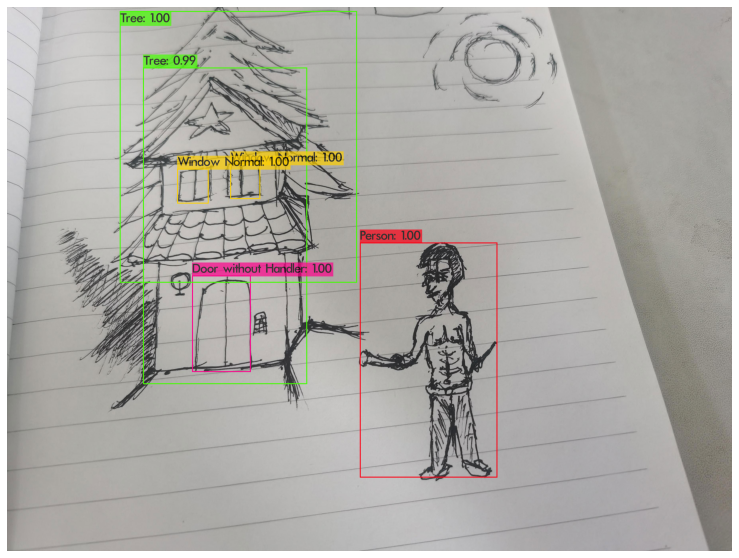

In [ ]:
#show image using helper function 
imShow('predictions.jpg')

In [ ]:
!cp data/train.txt data/test.txt

In [ ]:
!./darknet detector valid data/obj.data cfg/yolov3_testing.cfg /mydrive/yolov3/yolov3_training_last.weights -out "" -gpu 0 -thresh .5

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
results: Using default 'results'
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0,

In [ ]:
#evaluate the model
#calculate the recall
!./darknet detector recall data/obj.data cfg/yolov3_testing.cfg /mydrive/yolov3/yolov3_training_last.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

In [ ]:
!unzip /mydrive/yolov3/images2.zip -d data/obj

Archive:  /mydrive/yolov3/images2.zip
   creating: data/obj/images/
  inflating: data/obj/__MACOSX/._images  
  inflating: data/obj/images/63.JPG  
  inflating: data/obj/__MACOSX/images/._63.JPG  
  inflating: data/obj/images/77.jpg  
  inflating: data/obj/__MACOSX/images/._77.jpg  
  inflating: data/obj/images/84.jpeg  
  inflating: data/obj/__MACOSX/images/._84.jpeg  
  inflating: data/obj/images/76.jpg  
  inflating: data/obj/__MACOSX/images/._76.jpg  
  inflating: data/obj/images/62.jpg  
  inflating: data/obj/__MACOSX/images/._62.jpg  
  inflating: data/obj/images/74.jpg  
  inflating: data/obj/__MACOSX/images/._74.jpg  
  inflating: data/obj/images/60.jpg  
  inflating: data/obj/__MACOSX/images/._60.jpg  
  inflating: data/obj/images/48.png  
  inflating: data/obj/__MACOSX/images/._48.png  
  inflating: data/obj/images/49.png  
  inflating: data/obj/__MACOSX/images/._49.png  
  inflating: data/obj/images/61.jpg  
  inflating: data/obj/__MACOSX/images/._61.jpg  
  inflating: data/

In [ ]:
import glob
images_list = glob.glob("data/obj/images/*.jpg")
with open("data/test.txt", "w") as f:
    f.write("\n".join(images_list))

In [ ]:
import glob
images_list = glob.glob("data/obj/images/*.jpg")
for img in images_list:
  images = img.split('.')[0][-2:]
  print(images)
  with open("data/val.txt", "w") as f:
    f.write("\n".join(images))

70
76
31
50
71
73
28
45
75
35
/1
/6
80
60
37
62
23
78
38
86
77
68
10
66
46
64
/7
15
12
34
69
16
52
/2
59
51
85
82
21
43
26
67
29
19
/3
47
72
13
32
36
/5
74
24
54
30
20
33
65
61
55
79
18
25
83
81


In [ ]:
!./darknet detector valid data/obj.data cfg/yolov3_testing.cfg /mydrive/yolov3/yolov3_training_last.weights -out "" -gpu 0 -thresh .5

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
results: Using default 'results'
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0,

In [ ]:
#evaluate the model
#calculate the recall
!./darknet detector recall data/obj.data cfg/yolov3_testing.cfg /mydrive/yolov3/yolov3_training_last.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B